In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
from numpy.fft import fft, ifft, fftshift
%matplotlib inline

In [2]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');

<IPython.core.display.Javascript object>

In [3]:
def wavPlayer(data, rate):

    from scipy.io import wavfile
    from IPython.core.display import HTML, display
    import os
    import glob
    import tempfile

    #tmpwav="tmpwav.wav"       #=tempfile.TemporaryFile(delete=False) #
    tmpwav=tempfile.NamedTemporaryFile(dir='./tmp',prefix='tmp',suffix='.wav',delete=True).name
    if not os.path.isdir('./tmp'): os.path.mkdir('./tmp')
    try:
        for fl in glob.glob("./tmp/tmp*.wav"):
            os.remove(fl)
    except: 
        print("an exception occured")

    scaled = np.int16(data/np.max(np.abs(data)) * 32767)
    stmp=np.asarray(scaled,dtype=np.int16)
    wavfile.write(tmpwav,rate,stmp)
    html="""
    <audio controls="controls" style="width:600px" >
      <source src="{filename}" type="audio/wav">
    Your browser does not support the audio element.
    </audio>
    """.format(filename=os.path.join('./tmp',os.path.basename(tmpwav)))

    display(HTML(html))
    

In [4]:
def save_wav(filename, data,rate):

    from scipy.io import wavfile
    from IPython.core.display import HTML, display
    import tempfile

    scaled = np.int16(data/np.max(np.abs(data)) * 32767)
    stmp=np.asarray(scaled,dtype=np.int16)
    wavfile.write(filename,rate,stmp)
    

## An Amuzing Experiment...

We begin by loading and listening a well known music:

In [5]:
fs, sound = wavfile.read('test_sound.wav')
print("sampling rate = {} Hz, length = {} samples".format(fs, *sound.shape))
print(sound)
#plt.plot(sig);

FileNotFoundError: [Errno 2] No such file or directory: 'test_sound.wav'

In [6]:
wavPlayer(sound,fs)

NameError: name 'sound' is not defined

Now, we examine what happens when decimating, that is subsampling and cancelling one sample every two samples. Clearly, we are suppressing half of the information. Let us listen the result:

In [7]:
decimated_sig=sound[::2]
print("Length of decimated signal:", np.size(decimated_sig))
print(decimated_sig)
wavPlayer(decimated_sig, int(fs/2))

NameError: name 'sound' is not defined

**THIS IS QUITE INCREDIBLE! **

Though we have cancelled half of the samples, we hear that a new information -- a ghost voice from the Hereafter, appear... 

## The Explanation

Initial signal (before decimation)

In [8]:
plt.figure()
f=np.linspace(-0.5,0.5,np.size(sound))*fs
plt.plot(f,np.abs(fftshift(fft(sound))))
plt.xlabel("Frequency")
plt.xlim([-fs/2,fs/2])

NameError: name 'sound' is not defined

Because of the ear limitations, we do not really hear sounds of frequencies higer that 10-15 kHz. Therefore, we only hear the part below 10 kHz, which is Ravel's Bolero. 

After sampling and decimation -- Aliasing occurs...

The sound is sampled at fs/2=22050 Hz; but the actual band of the signal is larger than fs/4 (there exists frequency components at fs/2!). Consequently, aliasing will occur: the original spectrum will be periodized with a a period fs/2, and consequently the frequencies around -+fs/2 will aliase around zero... Therefore, the ghostly voice is transported in the audible band and we hear it.

In [9]:
plt.figure()
f=np.linspace(-0.5,0.5,np.size(decimated_sig))*fs/2
plt.plot(f,np.abs(fftshift(fft(decimated_sig))))
plt.xlabel("Frequency")
plt.xlim([-fs/4,fs/4])


NameError: name 'decimated_sig' is not defined

Observe hat this would have be avoided (but it would have been less funny) if we had implemented an `anti-aliasing` filter before the decimation operation. This is always a cautionary measure to take on. 

## Construction of the experiment

In [10]:
fs, bo = wavfile.read('Bo.wav')
print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *bo.shape))
print(bo)
#plt.plot(sig);

FileNotFoundError: [Errno 2] No such file or directory: 'Bo.wav'

In [11]:
fs, voix = wavfile.read('voix_outretombe.wav')
print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *voix.shape))
print(voix)
#plt.plot(sig);

sampling rate = 44100 Hz, length = 340928 samples, channels = 2
[[  73   73]
 [ -17  -16]
 [  53   50]
 ..., 
 [-147 -124]
 [-149 -146]
 [-170 -172]]


/usr/lib/python3/dist-packages/scipy/io/wavfile.py:42: WavFileWarning: Unknown wave file format
  warnings.warn("Unknown wave file format", WavFileWarning)


In [12]:
L=2000000
ssig=bo[L:340928+L]
del bo

NameError: name 'bo' is not defined

In [13]:
plt.plot(ssig);
plt.title("Bolero")
plt.figure()
plt.plot(voix);
plt.title("Voice")

NameError: name 'ssig' is not defined

In [14]:
wavPlayer(2*voix, fs)

FileNotFoundError: [Errno 2] No such file or directory: './tmp/tmpuyz84kik.wav'

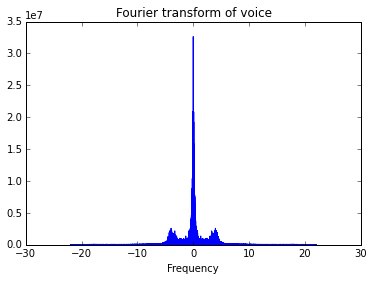

In [15]:
f=np.linspace(-0.5,0.5,len(voix))*44
plt.plot(f,np.abs(fftshift(fft(voix[:,1]))))
plt.title("Fourier transform of voice")
plt.xlabel("Frequency")

In [16]:
import scipy.signal as sig

### Design of lowpass antialiasing filter

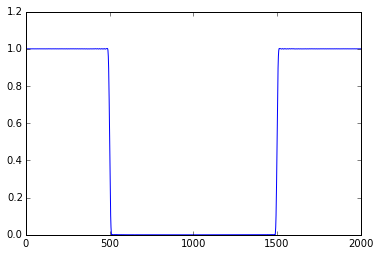

In [17]:
h=sig.firwin(300,0.5)

plt.plot(np.abs(np.fft.fft(h,2000)))

In [18]:
bo_filtered=sig.lfilter(h,[1],ssig[:,1])
plt.plot(np.abs(np.fft.fft(bo_filtered[2000:4000])))
plt.figure()
plt.plot(np.abs(np.fft.fft(ssig[2000:4000,1])))

NameError: name 'ssig' is not defined

In [19]:
wavPlayer(30*ssig[:,1], fs)

NameError: name 'ssig' is not defined

In [20]:
wavPlayer(30*bo_filtered, fs)

NameError: name 'bo_filtered' is not defined

### Modulation

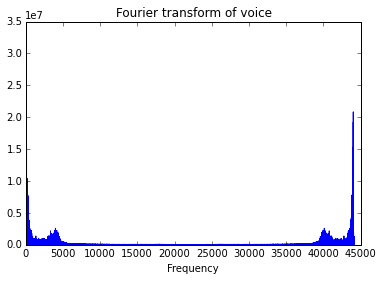

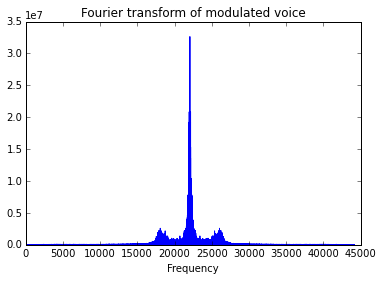

In [21]:
t=np.arange(0,len(voix[:,1]))*1/fs
f=np.linspace(0,1,len(voix[:,1]))*fs
voix_mod=voix[:,1]*np.cos(2*pi*fs/2*t)
plt.figure()
plt.plot(f,np.abs(fft(voix[:,1])))
plt.xlabel("Frequency")
plt.title("Fourier transform of voice")

plt.figure()
plt.plot(f,np.abs(np.fft.fft(voix_mod)))
plt.xlabel("Frequency")
plt.title("Fourier transform of modulated voice")

In [22]:
wavPlayer(4*voix_mod, fs)

FileNotFoundError: [Errno 2] No such file or directory: './tmp/tmpjcygdda7.wav'

In [23]:
composite_signal=30*bo_filtered+6*voix_mod
wavPlayer(composite_signal, fs)

NameError: name 'bo_filtered' is not defined

In [24]:
plt.figure()
plt.plot(np.abs(np.fft.fft(composite_signal)))

NameError: name 'composite_signal' is not defined

In [25]:
# saving the composite signal
#save_wav('test_sound.wav',composite_signal,fs)

In [26]:
subsampled_sig=composite_signal[::2]
wavPlayer(subsampled_sig, int(fs/2))

NameError: name 'composite_signal' is not defined